In [1]:
import os
import sys
import scipy.io
from scipy import ndimage, spatial
# Add the path which contains wrappers for II harwares

#sys.path.append(r'.\Hardware_src') # Make the change according to your path
import json
import pickle
# Python modules for figure visualization
import numpy as np
import matplotlib.pyplot as plt
#from helper import check_minmax
#from IPython.display import clear_output
#from IPython.display import display, HTML
import time
from numpy.linalg import inv

In [2]:
filt_1 = np.load("Newest_data/scene3_img_filt_1_ap_16_exp_70.npy")
filt_2 = np.load("Newest_data/scene3_img_filt_2_ap_16_exp_70.npy")
filt_3 = np.load("Newest_data/scene3_img_filt_3_ap_16_exp_70.npy")
filt_4 = np.load("Newest_data/scene3_img_filt_4_ap_16_exp_70.npy")
filt_5 = np.load("Newest_data/scene3_img_filt_5_ap_16_exp_70.npy")
filt_6 = np.load("Newest_data/scene3_img_filt_6_ap_16_exp_70.npy")
no_filt = np.load("Newest_data/scene3_img_filt_no_ap_16_exp_70.npy")
filt_1.shape

(5, 1024, 1280)

(1024, 1280)

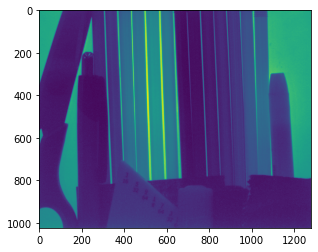

In [8]:
mean_img1 = np.mean(filt_1, axis = 0)
mean_img2 = np.mean(filt_2, axis = 0)
mean_img3 = np.mean(filt_3, axis = 0)
mean_img4 = np.mean(filt_4, axis = 0)
mean_img5 = np.mean(filt_5, axis = 0)
mean_img6 = np.mean(filt_6, axis = 0)
mean_img7 = np.mean(no_filt, axis = 0)


plt.figure()
plt.imshow(mean_img2)
mean_img1.shape

In [21]:
tf = scipy.io.loadmat("transfer_functions.mat") #Taken from blackboard
L = tf['L']
F = tf['F']
db = tf['db1']
dl = tf['dl']
ds = tf['ds']
wavelength = tf["lambda"]
#tf
dl.shape
ds.shape

(1, 351)

# A Matrix

In [5]:
# Make noise for D_epsilon
epsilon = 1e-5
s3 = np.eye(3)*epsilon
s7= np.eye(7)*epsilon
#mu, sigma = 0, 0.01 # mean and standard deviation
#s7 = np.random.normal(mu, sigma, (7,7))
#s3 = np.random.normal(mu, sigma, (3,3))


FFt = np.dot(F, np.transpose(F))+s7
invFFt = inv(FFt)

LtL = np.dot(np.transpose(L), L)+s3
invLtL = inv(LtL)


print(invLtL.shape)
print(invFFt.shape)
print(L.T.shape)

(3, 3)
(7, 7)
(3, 351)


In [6]:
#epsilon = s.reshape((1, -1))
D = np.divide(1, (np.multiply(db, dl, ds) + epsilon))
D = np.multiply(np.eye(351),D)
print(D.shape)
#print(db.shape)
#print(ds.shape)
#print(dl.shape)

(351, 351)


(3, 3)
(3, 351)
(351, 351)
(351, 7)
(7, 7)
(351,)


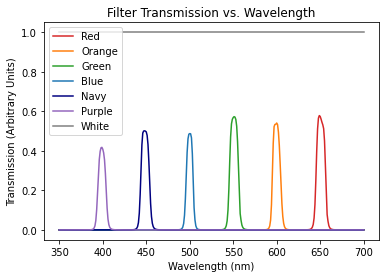

In [7]:
#print(np.multiply(db, dl, ds).shape)
print(invLtL.shape)
print(L.T.shape)
print(D.shape)
print(F.T.shape)
print(invFFt.shape)
#print(db1.shape)
#print(ds.shape)
#print(dl.shape)
#print(np.multiply(invLtL @ L.T, D).shape)
print(wavelength.squeeze().shape)

#F3 = 1, F1 = 5, F0 = 6, F4 = 2, F5 = 3, F2 = 4
plt.plot(wavelength.squeeze(), F[0,:],'tab:red' , label = "Red")
plt.plot(wavelength.squeeze(), F[1,:],'tab:orange',  label = "Orange")
plt.plot(wavelength.squeeze(), F[2,:], 'tab:green',label = "Green")
plt.plot(wavelength.squeeze(), F[3,:], 'tab:blue', label = "Blue")
plt.plot(wavelength.squeeze(), F[4,:],color='navy', label = "Navy")
plt.plot(wavelength.squeeze(), F[5,:], 'tab:purple', label = "Purple")
plt.plot(wavelength.squeeze(), F[6,:], 'tab:gray',  label = "White")
plt.title("Filter Transmission vs. Wavelength")
plt.ylabel("Transmission (Arbitrary Units)")
plt.xlabel("Wavelength (nm)")
plt.legend(loc='upper left')
plt.show()
#plt.savefig("filter_trans.png")

In [9]:
A = invLtL @ L.T @ D @ F.T @ invFFt

In [68]:
print(A.shape)
print(A)

(3, 7)
[[-1.21157772e+00 -1.37070991e+00 -1.32792460e+00 -1.60515984e+00
  -1.52219776e+00 -3.58196050e+01  6.20761659e-01]
 [ 5.53261481e+01  5.96273073e+01  5.55892588e+01  6.69071148e+01
   6.34370236e+01  1.54955164e+03 -2.58700372e+01]
 [-2.82541765e+02 -3.04487777e+02 -2.83680427e+02 -3.39712056e+02
  -3.23807066e+02 -7.90634903e+03  1.32102180e+02]]


In [15]:
#SVD

data_stacked = np.array([mean_img1, mean_img2, mean_img3, mean_img4, mean_img5, mean_img6, mean_img7])
mean = np.mean(data_stacked, axis = 0)
std = np.std(data_stacked, axis = 0)
data_centered = np.subtract(data_stacked, mean)
data_standardized = data_centered/std
data_standardized.shape

(7, 1024, 1280)

In [19]:
#construct correlation matrix
#[a, b, c = data_standardized.shape()
data_reshaped = np.reshape(data_standardized, (7, 1024*1280))
correlation_matrix = np.dot(data_reshaped, np.transpose(data_reshaped))
data_reshaped.shape

#correlation_matrix.shape

(7, 1310720)

In [78]:
u, s, vh = np.linalg.svd(correlation_matrix)

In [79]:
print(s)
print(u)

[8.57169145e+06 4.43258129e+05 1.03307042e+05 3.70276668e+04
 1.44354826e+04 5.32022838e+03 1.10239887e-09]
[[-0.11128698 -0.02441128 -0.88709625  0.17057448 -0.16217934 -0.04271551
   0.37796447]
 [-0.12314248 -0.17373539  0.25903959  0.73503109  0.24813417  0.3779577
   0.37796447]
 [-0.18615444 -0.27662489  0.30300853  0.08935921 -0.31883602 -0.73791084
   0.37796447]
 [-0.25769412 -0.26485218  0.15418007 -0.49344644 -0.40620444  0.53696088
   0.37796447]
 [-0.05784047  0.89889787  0.1672999  -0.00400804 -0.13328818 -0.00298262
   0.37796447]
 [-0.17834292 -0.04921839 -0.03269384 -0.4151656   0.79203321 -0.1488833
   0.37796447]
 [ 0.91446142 -0.11005576  0.03626199 -0.08234468 -0.0196594   0.01757368
   0.37796447]]


# The calculation of the x_out

In [10]:
#data_stackedreshaped = np.reshape(data_stacked, (6, 1024*1280))
out = np.dot(u, data_reshaped)

NameError: name 'u' is not defined

In [82]:
print(out.shape)
print(A.shape)

(7, 1310720)
(3, 7)


In [11]:
# Test Image: 
#F3 = 1, F1 = 5, F0 = 6, F4 = 2, F5 = 3, F2 = 4

test = np.reshape(out[0, :], (1024, 1280))
# remove first column of A just to test. 


A_del = np.delete(A, 0, axis=1)


pic = np.zeros(out[1,:].shape)
print(out.shape[1])
print(pic[0])
print(pic.shape)
for i in range(out.shape[1]):
    pic[i] = db @ L @ A @ out[:,i] # (3x1) array 
    

NameError: name 'out' is not defined

In [12]:
pic_show = np.reshape(pic, (1024, 1280))
print(pic_show.shape)

NameError: name 'pic' is not defined

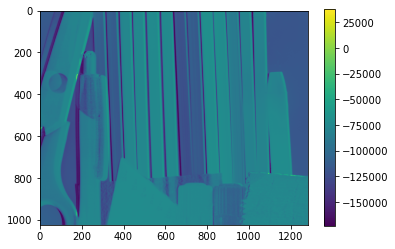

In [87]:
plt.imshow(np.reshape(pic, (1024, 1280)))
plt.colorbar()

In [ ]:
print(out.shape)
pix = A_del @ out[:,1] 
print(pix.shape)

In [ ]:
#filt_1 visualization
plt.imshow(np.reshape(out[0, :], (1024, 1280)), cmap = 'gray')
plt.colorbar()

In [ ]:
plt.imshow(np.reshape(out[1, :], (1024, 1280)), cmap= 'gray')
plt.colorbar()

In [ ]:
plt.imshow(np.reshape(out[2, :], (1024, 1280)), cmap= 'gray')
plt.colorbar()

In [ ]:
plt.imshow(np.reshape(out[3, :], (1024, 1280)), cmap= 'gray')
plt.colorbar()

In [ ]:
plt.imshow(np.reshape(out[4, :], (1024, 1280)), cmap= 'gray')
plt.colorbar()

In [ ]:
#plt.figure()
plt.imshow(np.reshape(out[5, :], (1024, 1280)), cmap= 'gray')
plt.colorbar()

In [13]:
L = tf['L']
F = tf['F']
db = tf['db1']
dl = tf['dl']
ds = tf['ds']

# Make noise for D_epsilon
eps = [1e-5, 1e-4, 1e-3, 1e-2]
for i in range(len(eps)):
    epsilon = eps[i]
    s3 = np.eye(3)*epsilon
    s7= np.eye(7)*epsilon

    FFt = np.dot(F, np.transpose(F))+s7
    invFFt = inv(FFt)

    LtL = np.dot(np.transpose(L), L)+s3
    invLtL = inv(LtL)

    D = np.divide(1, (np.multiply(db, dl, ds) + epsilon))
    D = np.multiply(np.eye(351),D)

    A = invLtL @ L.T @ D @ F.T @ invFFt

In [49]:
Dl = np.multiply(np.eye(351),dl)
Ds = np.multiply(np.eye(351),ds)

Fdlds = F @ Dl @ Ds
Fdlds.shape

(7, 351)

In [33]:
data_reshaped.shape

(7, 1310720)

In [50]:
y = data_stacked.T @ Fdlds

y.shape

(1280, 1024, 351)

In [40]:
print(db.shape)
print(L.shape)
A.shape

(1, 351)
(351, 3)


(3, 7)

In [53]:
Db = np.multiply(np.eye(351),db)
out = Db @ L @ A
out.shape

(351, 7)

In [54]:
x_out = y @ out

In [56]:
x_out.shape

(1280, 1024, 7)

In [14]:


test = np.reshape(out[0, :], (1024, 1280))
# remove first column of A just to test. 

A_del = np.delete(A, 0, axis=1)

pic = np.zeros(out[1,:].shape)
print(out.shape[1])
print(pic[0])
print(pic.shape)
for i in range(out.shape[1]):
    pic[i] = db @ L @ A_del @ out[:,i] # (3x1) array 

NameError: name 'out' is not defined